In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Assuming 'df' is your DataFrame
result = kruskal(df[df['Disaster Type'] == 'Flood']['Total Deaths'],
                 df[df['Disaster Type'] == 'Storm']['Total Deaths'],
                 df[df['Disaster Type'] == 'Earthquake']['Total Deaths'])

print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Set a color palette
colors = sns.color_palette("Set2")

# Box plot for visualization with added color and width
plt.figure(figsize=(12, 8))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=df, palette=colors, width=0.6)
sns.stripplot(x='Disaster Type', y='Total Deaths', data=df, color=".25", size=1)

# Beautify the plot
plt.title('Comparison of Total Deaths by Disaster Type')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()


NameError: name 'kruskal' is not defined

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Assuming 'df' is your DataFrame
# Replace 'Continent' with the actual column name representing the continent
# Replace 'No Homeless' with the actual column name for the number of homeless people
asia_homeless = df[df['Continent'] == 'Asia']['No Homeless'].dropna()
europe_homeless = df[df['Continent'] == 'Europe']['No Homeless'].dropna()

# Ensure both samples have the same length
min_length = min(len(asia_homeless), len(europe_homeless))
asia_homeless = asia_homeless[:min_length]
europe_homeless = europe_homeless[:min_length]

# Wilcoxon Signed-Rank Test
statistic, p_value = wilcoxon(asia_homeless, europe_homeless, alternative='two-sided')

# Output the results
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the number of homeless people between Asia and Europe.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of homeless people between Asia and Europe.")

# Bar plot without outliers
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='No Homeless', data=df[df['Continent'].isin(['Asia', 'Europe'])], ci=None, estimator=sum)
plt.title('Comparison of Number of Homeless People between Asia and Europe')
plt.show()

NameError: name 'df' is not defined

In [21]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select relevant columns for analysis
analysis_data = df[['Continent', 'Total Damages (000 US$)', 'Total Deaths']]

# Drop rows with missing values in relevant columns
analysis_data = analysis_data.dropna()

# Kruskal-Wallis test for Total Damages
result_damages = kruskal(*[group['Total Damages (000 US$)'] for name, group in analysis_data.groupby('Continent')])
print(f"Kruskal-Wallis Test Statistic for Total Damages: {result_damages.statistic}")
print(f"P-value for Total Damages: {result_damages.pvalue}")

# Hypothesis for Total Damages
if result_damages.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference in economic impact across continents.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in economic impact across continents.")

# Kruskal-Wallis test for Total Deaths
result_deaths = kruskal(*[group['Total Deaths'] for name, group in analysis_data.groupby('Continent')])
print(f"\nKruskal-Wallis Test Statistic for Total Deaths: {result_deaths.statistic}")
print(f"P-value for Total Deaths: {result_deaths.pvalue}")

# Hypothesis for Total Deaths
if result_deaths.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the average number of deaths across continents.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of deaths across continents.")

# Box plot for Total Damages by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Total Damages (000 US$)', data=analysis_data)
plt.title('Total Damages Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Damages (000 US$)')
plt.show()

# Box plot for Total Deaths by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Total Deaths', data=analysis_data)
plt.title('Total Deaths Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.show()

KeyError: "['Total Damages (000 US$)'] not in index"

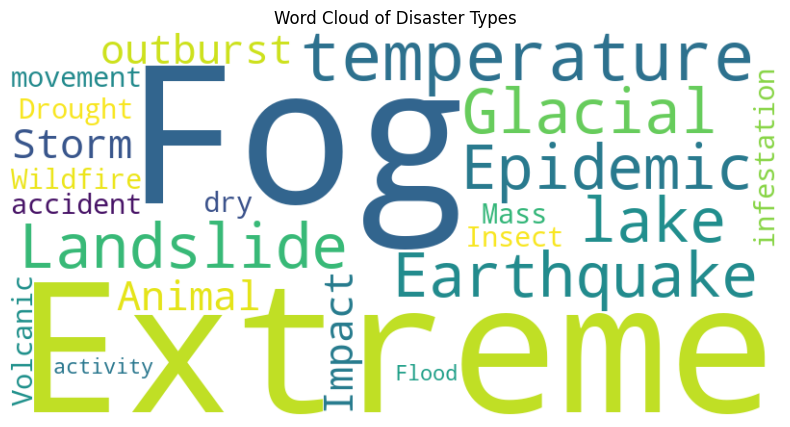

Chi-square Test Statistic: 0.0
P-value: 1.0


In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import pandas as pd

disaster_type_counts = df['Disaster Type'].value_counts()

text = ' '.join(set(df['Disaster Type'].dropna()))  
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster Types')
plt.show()

observed_counts = disaster_type_counts.values.reshape(-1, 1)
expected_counts = len(df) / len(disaster_type_counts)
expected_counts = [expected_counts] * len(disaster_type_counts)
expected_counts = pd.Series(expected_counts, index=disaster_type_counts.index).values.reshape(-1, 1)

chi2_stat, p_value, _, _ = chi2_contingency(observed_counts)
print(f"Chi-square Test Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

In [18]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select relevant columns for analysis
analysis_data = df[['Continent', 'Total Damages (000 US$)', 'Total Deaths']]

# Drop rows with missing values in relevant columns
analysis_data = analysis_data.dropna()

# Kruskal-Wallis test for Total Damages
result_damages = kruskal(*[group['Total Damages (000 US$)'] for name, group in analysis_data.groupby('Continent')])
print(f"Kruskal-Wallis Test Statistic for Total Damages: {result_damages.statistic}")
print(f"P-value for Total Damages: {result_damages.pvalue}")

# Kruskal-Wallis test for Total Deaths
result_deaths = kruskal(*[group['Total Deaths'] for name, group in analysis_data.groupby('Continent')])
print(f"Kruskal-Wallis Test Statistic for Total Deaths: {result_deaths.statistic}")
print(f"P-value for Total Deaths: {result_deaths.pvalue}")

# Box plot for Total Damages by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Total Damages (000 US$)', data=analysis_data, palette='Set2')
plt.title('Distribution of Total Damages by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Damages (000 US$)')
plt.show()

# Box plot for Total Deaths by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Total Deaths', data=analysis_data, palette='Set2')
plt.title('Distribution of Total Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.show()


KeyError: "['Total Damages (000 US$)'] not in index"

In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
import os
df = pd.read_csv('da2.csv', encoding='latin1')


import numpy as np
import pandas as pd 
from scipy.stats import anderson

# Assuming 'nd' is your DataFrame
numerical_column = 'Total Deaths'

# Extract the numerical column
numerical_data = df[numerical_column]

# Perform the Anderson-Darling test
result = anderson(numerical_data)

# The Anderson-Darling test returns a statistic and a critical values array
# If the Anderson-Darling statistic is less than the critical value at a certain significance level, you may assume normality
if result.statistic < result.critical_values[2]:
    print(f"{numerical_column} appears to be normally distributed.")
else:
    print(f"{numerical_column} does not appear to be normally distributed.")


Total Deaths does not appear to be normally distributed.


C:\Users\91949\AppData\Local\Temp\ipykernel_25332\3965803131.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


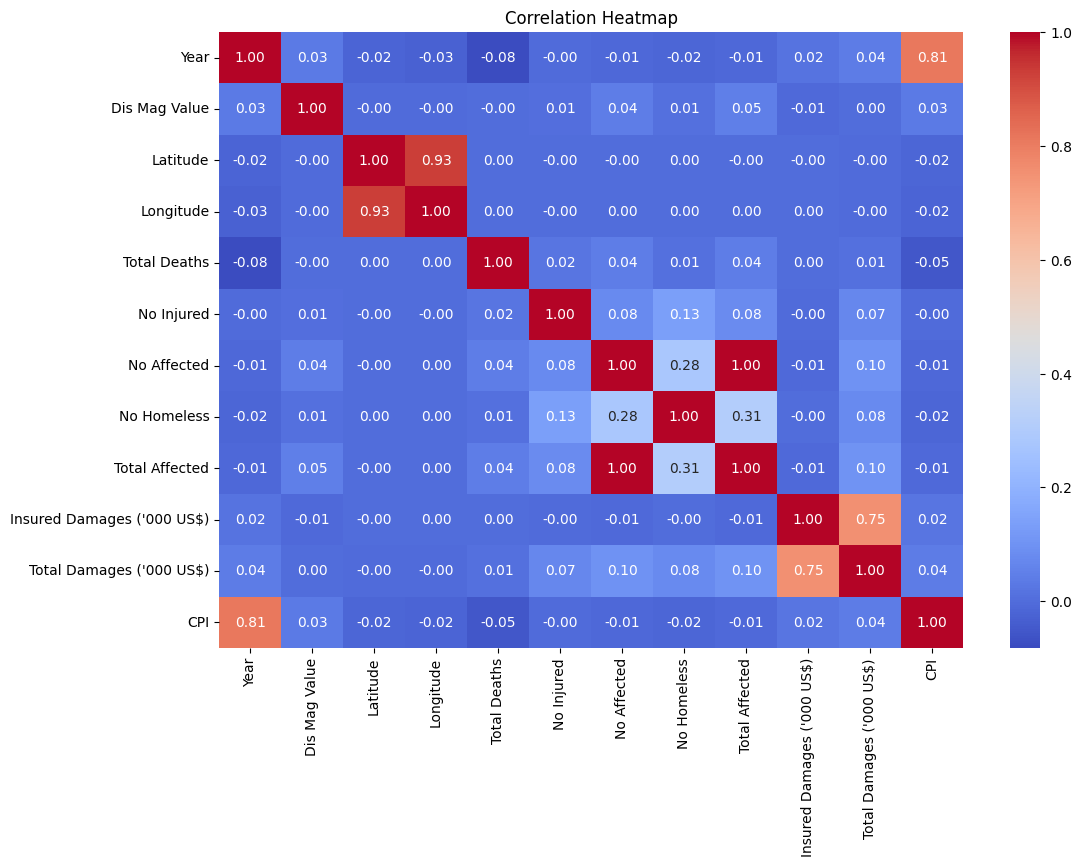

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select relevant columns for analysis
time_data = df[['Start Month', 'Start Day']]

# Drop rows with missing values in relevant columns
time_data = time_data.dropna()

# Create a count plot for Start Month
plt.figure(figsize=(12, 6))
sns.countplot(x='Start Month', data=time_data, palette='viridis')
plt.title('Frequency of Disasters by Start Month')
plt.xlabel('Start Month')
plt.ylabel('Frequency')
plt.show()

# Create a count plot for Start Day
plt.figure(figsize=(12, 6))
sns.countplot(x='Start Day', data=time_data, palette='viridis')
plt.title('Frequency of Disasters by Start Day')
plt.xlabel('Start Day')
plt.ylabel('Frequency')
plt.show()

KeyError: "None of [Index(['Start Month', 'Start Day'], dtype='object')] are in the [columns]"

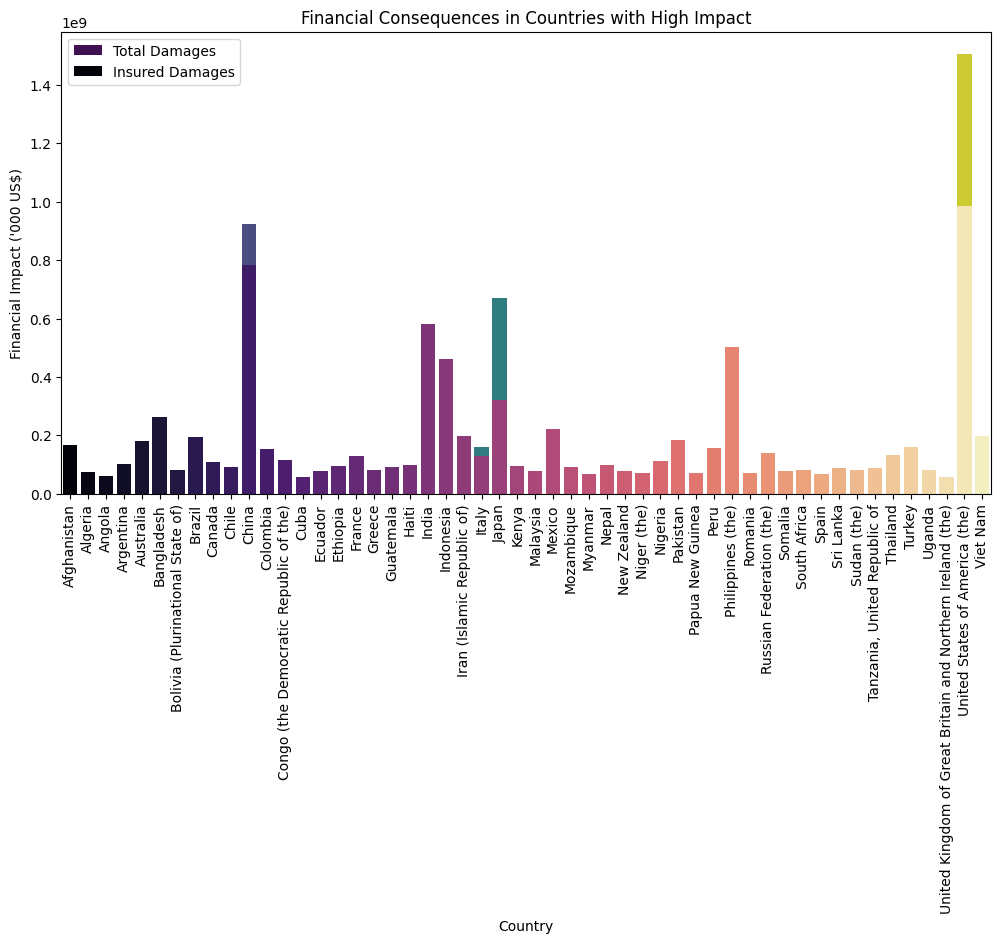

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select relevant columns for analysis
financial_data = df[['Country', 'Total Damages (\'000 US$)', 'Insured Damages (\'000 US$)']]

# Drop rows with missing values in relevant columns
financial_data = financial_data.dropna()

# Group by country and calculate the total financial impact
total_impact_by_country = financial_data.groupby('Country')[['Total Damages (\'000 US$)', 'Insured Damages (\'000 US$)']].sum()

# Identify regions with consistently high financial consequences
high_impact_countries = total_impact_by_country[
    (total_impact_by_country['Total Damages (\'000 US$)'] > total_impact_by_country['Total Damages (\'000 US$)'].mean()) &
    (total_impact_by_country['Insured Damages (\'000 US$)'] > total_impact_by_country['Insured Damages (\'000 US$)'].mean())
]

# Visualization using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=high_impact_countries.index, y='Total Damages (\'000 US$)', data=high_impact_countries, palette='viridis', label='Total Damages')
sns.barplot(x=high_impact_countries.index, y='Insured Damages (\'000 US$)', data=high_impact_countries, palette='magma', label='Insured Damages')
plt.title('Financial Consequences in Countries with High Impact')
plt.xlabel('Country')
plt.ylabel('Financial Impact (\'000 US$)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [12]:
import pandas as pd
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns: 'Start Year', 'Total Damages (\'000 US$)', 'Insured Damages (\'000 US$)'
# Assuming COVID-19 period is from 2020 onwards
pre_covid_data = df[df['Start Date'] < 20-2-2020]
covid_data = df[df['Start Date'] >= 20-2-2020]
df.rename(columns={"Insured Damages ('000 US$')": "Insured_Damages"}, inplace=True)
result = kruskal(*[group['Insured_Damages'] for name, group in df.groupby('Disaster Type')])
plt.figure(figsize=(12, 8))
sns.boxplot(x='Disaster Type', y='Insured Damages (\'000 US$\')', data=df)
plt.title('Economic Impact by Disaster Type')
plt.show()


# Perform Kruskal-Wallis test for Total Damages
result_total = kruskal(pre_covid_data['Total Damages (\'000 US$)'], covid_data['Total Damages (\'000 US$)'])
print(f"Kruskal-Wallis Test Statistic for Total Damages: {result_total.statistic}")
print(f"P-value for Total Damages: {result_total.pvalue}")

# Perform Kruskal-Wallis test for Insured Damages
result_insured = kruskal(pre_covid_data['Insured Damages (\'000 US$)'], covid_data['Insured Damages (\'000 US$)'])
print(f"Kruskal-Wallis Test Statistic for Insured Damages: {result_insured.statistic}")
print(f"P-value for Insured Damages: {result_insured.pvalue}")

# Visualize the financial impact changes
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.boxplot([pre_covid_data['Total Damages (\'000 US$)'], covid_data['Total Damages (\'000 US$)']], labels=['Pre-COVID', 'COVID'])
plt.title('Total Damages Before and During COVID-19 Pandemic')
plt.ylabel('Total Damages (\'000 US$)')

plt.subplot(2, 1, 2)
plt.boxplot([pre_covid_data['Insured Damages (\'000 US$)'], covid_data['Insured Damages (\'000 US$)']], labels=['Pre-COVID', 'COVID'])
plt.title('Insured Damages Before and During COVID-19 Pandemic')
plt.ylabel('Insured Damages (\'000 US$)')

plt.tight_layout()
plt.show()

TypeError: '<' not supported between instances of 'str' and 'int'

In [13]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['Month'] = pd.to_datetime(data['Start Date']).dt.month
columns_for_comparison = ['Month', 'Disaster Type']
kruskal_result = kruskal(*[group['Disaster Type'].values for _, group in data.groupby('Month')])
print("Kruskal result",kruskal_result)
sns.boxplot(x = 'Month', y = 'Disaster Type', data = data)
sns.stripplot(x = 'Month', y = 'Disaster Type', data = data, color = ".25", size = 1)
import matplotlib.pyplot as plt
plt.show()

NameError: name 'data' is not defined

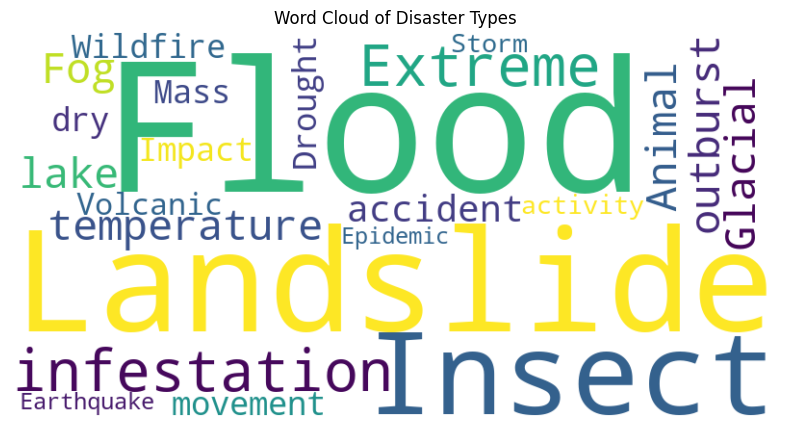

In [26]:
# pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
text = ' '.join(set(df['Disaster Type'].dropna()))  # Using set to remove duplicates
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster Types')
plt.show()



Kruskal-Wallis Test Statistic: 53.84759521360615
P-value: 5.663928327179605e-11


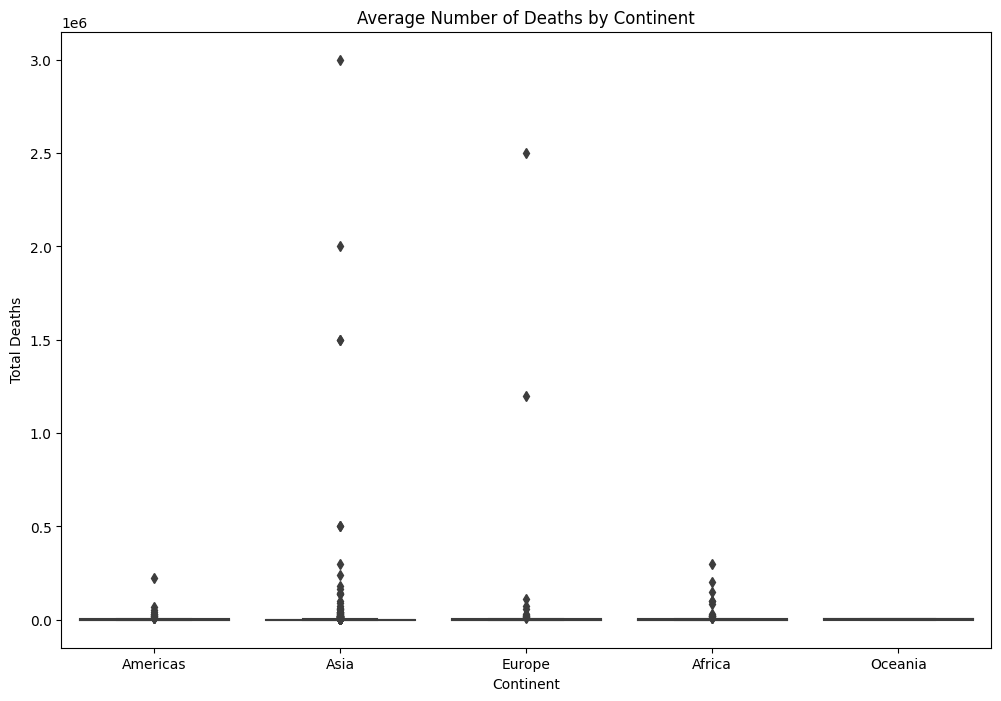

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Kruskal-Wallis test to compare average deaths across continents
result = kruskal(*[group['Total Deaths'] for name, group in df.groupby('Continent')])

print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Box plot for visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x='Continent', y='Total Deaths', data=df)
plt.title('Average Number of Deaths by Continent')
plt.show()


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Rename the column with a simpler name
df.rename(columns={"Insured Damages (000 US$)": "Insured Damages"}, inplace=True)

# Kruskal-Wallis test for insured damages by disaster type
result = kruskal(*[group['Insured Damages'] for name, group in df.groupby('Disaster Type')])

print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Box plot for visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x='Disaster Type', y='Insured Damages', data=df)
plt.title('Economic Impact by Disaster Type')
plt.show()


KeyError: 'Insured Damages'

Kruskal-Wallis Test Statistic: 1167.5006918085335
P-value: 1.6786321289708755e-240
Reject the null hypothesis. There is a significant difference in the average number of deaths across different disaster types.


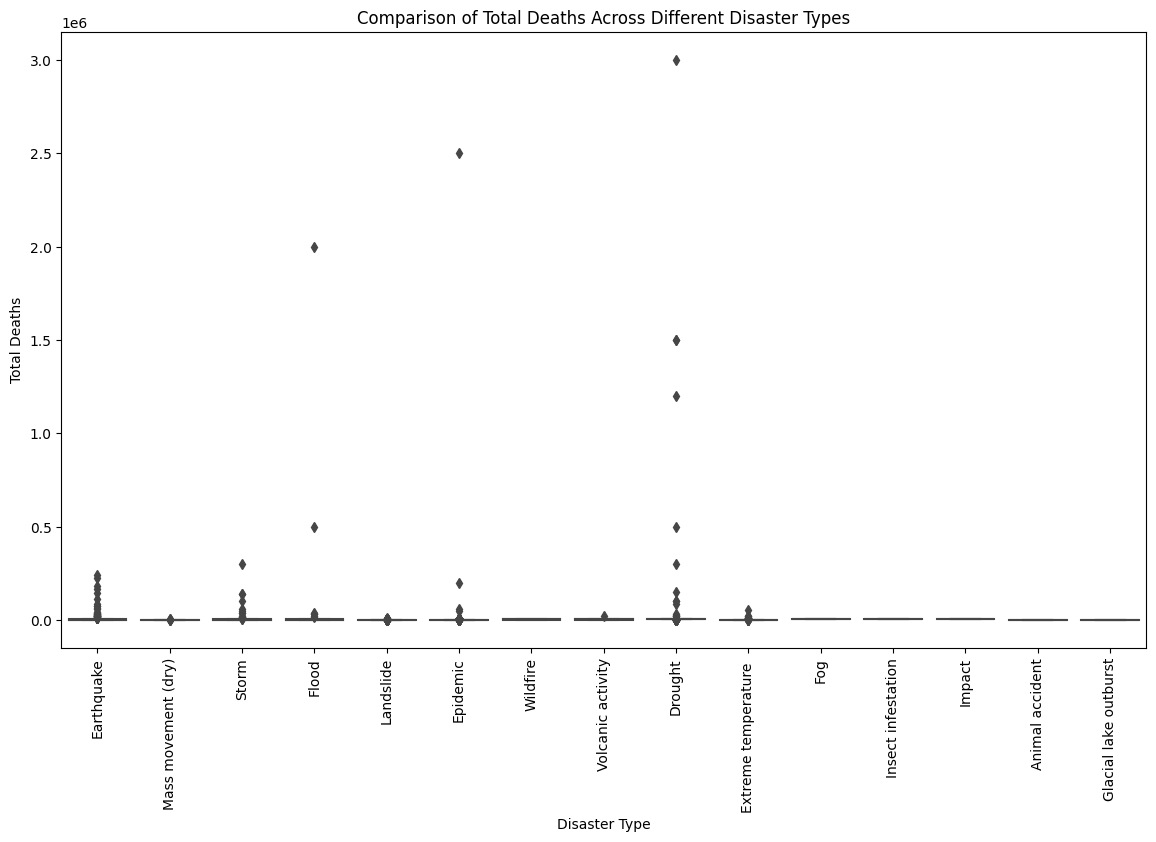

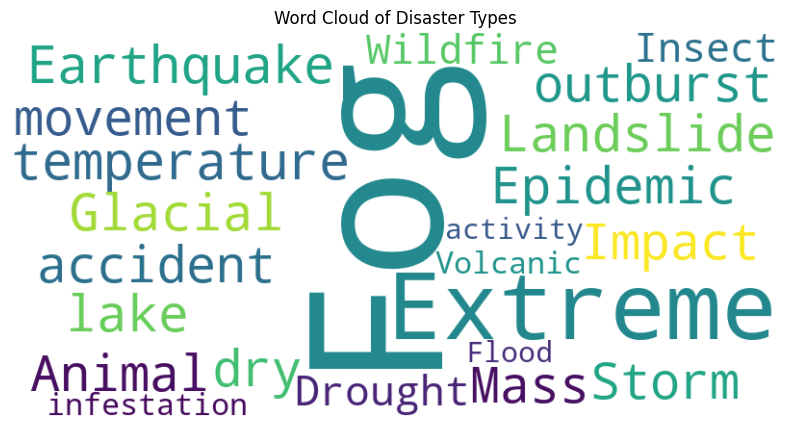

C:\Users\91949\AppData\Local\Temp\ipykernel_27080\1890014642.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


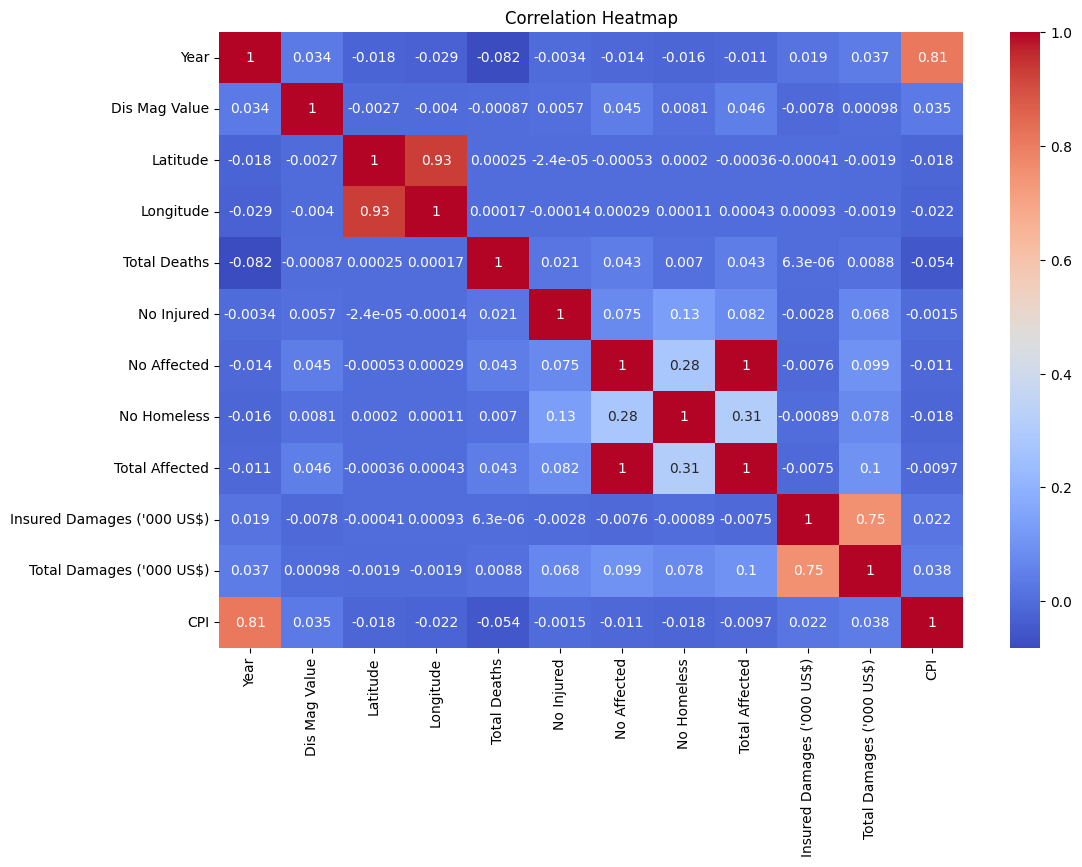

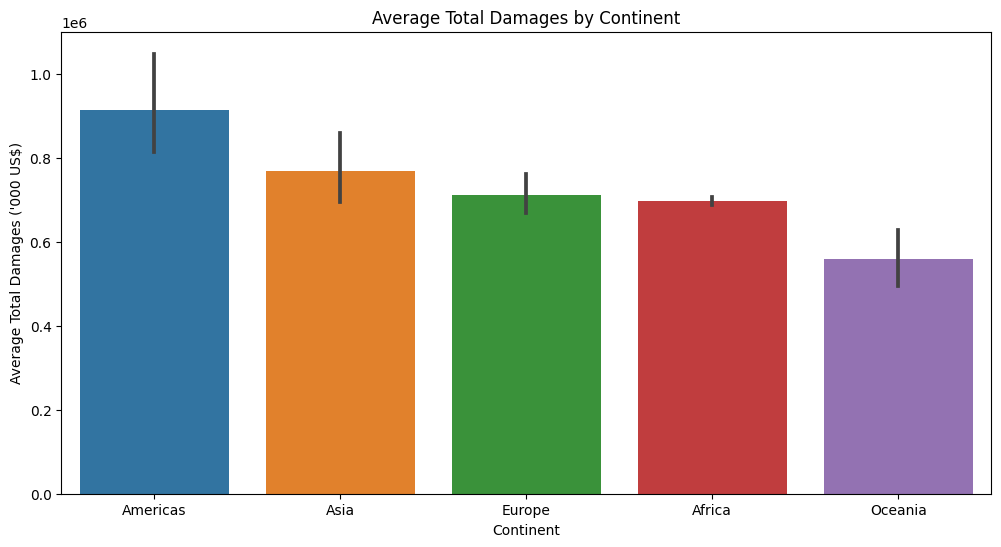

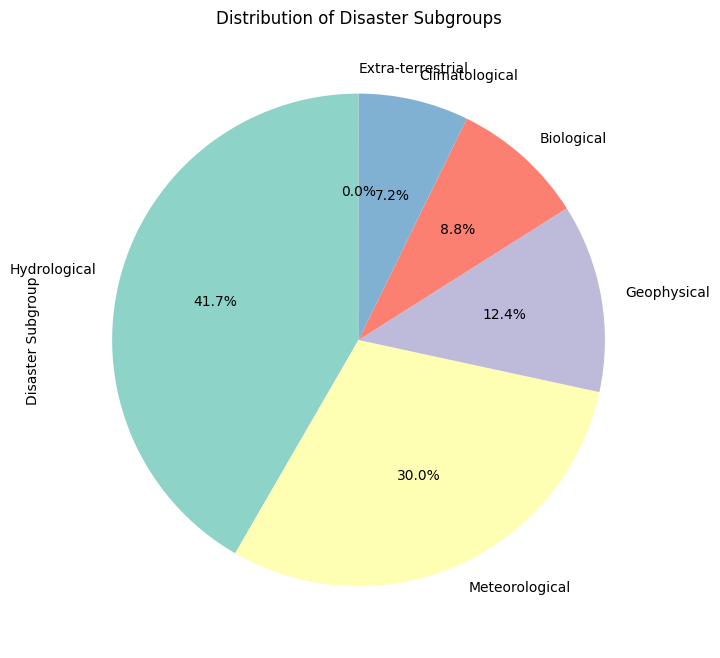

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Assuming 'df' is your DataFrame
# Select relevant columns for analysis
data_for_analysis = df[['Disaster Type', 'Total Deaths']]

# Drop rows with missing values
data_for_analysis = data_for_analysis.dropna()

# Kruskal-Wallis test
result = kruskal(*[group['Total Deaths'] for name, group in data_for_analysis.groupby('Disaster Type')])
print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Interpret the results
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of deaths across different disaster types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of deaths across different disaster types.")

# Visualization - Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=data_for_analysis)
plt.title('Comparison of Total Deaths Across Different Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)
plt.show()

# Additional Plots:
# Word Cloud for Disaster Types
text = ' '.join(set(df['Disaster Type'].dropna()))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disaster Types')
plt.show()

# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar plot for average Total Damages by Continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Total Damages (\'000 US$)', data=df)
plt.title('Average Total Damages by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Total Damages (\'000 US$)')
plt.show()

# Pie chart for the distribution of Disaster Subgroups
plt.figure(figsize=(8, 8))
df['Disaster Subgroup'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of Disaster Subgroups')
plt.show()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
df =pd.read_csv('da2.csv')
data_for_analysis = df[['Disaster Type', 'Total Deaths']]
data_for_analysis = data_for_analysis.dropna()
result = kruskal(*[group['Total Deaths'] for name, group in data_for_analysis.groupby('Disaster Type')])
print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of deaths across different disaster types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of deaths across different disaster types.")
plt.figure(figsize=(14, 8))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=data_for_analysis)
plt.title('Comparison of Total Deaths Across Different Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10388: invalid continuation byte

Kruskal-Wallis Test Statistic: 1167.5006918085335
P-value: 1.6786321289708755e-240
Reject the null hypothesis. There is a significant difference in the average number of deaths across different disaster types.


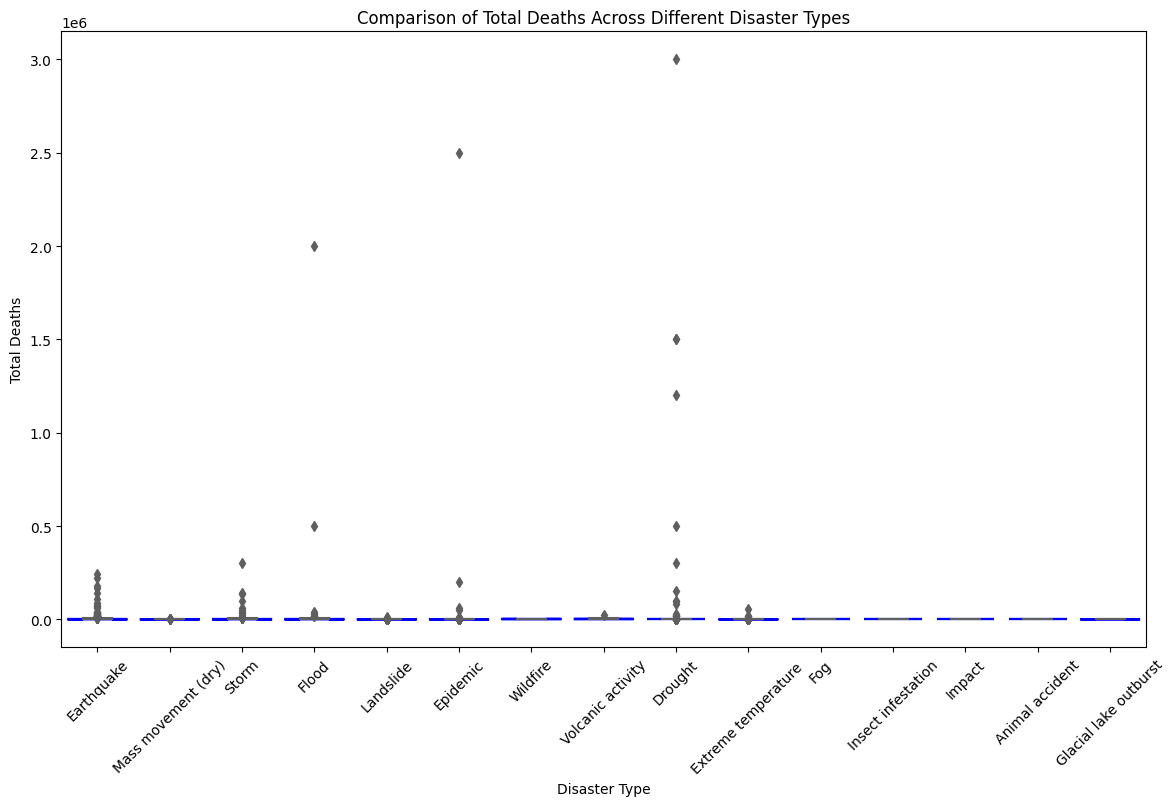

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Assuming 'df' is your DataFrame
# Select relevant columns for analysis
data_for_analysis = df[['Disaster Type', 'Total Deaths']]

# Drop rows with missing values
data_for_analysis = data_for_analysis.dropna()

# Kruskal-Wallis test
result = kruskal(*[group['Total Deaths'] for name, group in data_for_analysis.groupby('Disaster Type')])

# Output the results
print(f"Kruskal-Wallis Test Statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Interpret the results
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of deaths across different disaster types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of deaths across different disaster types.")

# Visualization - Box plot with colors and boxes
plt.figure(figsize=(14, 8))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=data_for_analysis, palette='Set3', notch=True, boxprops=dict(facecolor='red', color='blue'))
plt.title('Comparison of Total Deaths Across Different Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
df = pd.read_csv('da2.csv')


# Assuming 'df' is your DataFrame
# Replace these column names with the actual columns in your dataset
tsunami_deaths = df[df['Disaster Type'] == 'Tsunami/Tidal wave']['Total Deaths'].dropna()
flood_deaths = df[df['Disaster Type'] == 'Flood']['Total Deaths'].dropna()

# Wilcoxon Signed-Rank Test for independent samples
statistic, p_value = wilcoxon(tsunami_deaths, flood_deaths, alternative='two-sided')

# Output the results
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the number of total deaths between disasters associated with tsunamis/tidal waves and those associated with floods.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of total deaths between disasters associated with tsunamis/tidal waves and those associated with floods.")

# Visualization - Box plot for Total Deaths by Disaster Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=df[df['Disaster Type'].isin(['Tsunami/Tidal wave', 'Flood'])])
plt.title('Comparison of Total Deaths between Tsunamis/Tidal Waves and Floods')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10388: invalid continuation byte

In [35]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create a GeoDataFrame for geospatial analysis
gdf = gpd.GeoDataFrame(df, geometry=Point(df['Longitude'], df['Latitude']))

# World map shapefile (you may need to download this file)
world_map = gpd.read_file('path/to/world_shapefile.shp')

# Plotting the geospatial distribution of disasters on the world map
fig, ax = plt.subplots(figsize=(15, 10))
world_map.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.7)
plt.title('Geospatial Distribution of Natural Disasters')

# Show the plot directly in VS Code
plt.show()


ValueError: Point() takes only scalar or 1-size vector arguments, got (0       -91.000000
1        72.011227
2        72.011227
3        72.011227
4        76.160000
           ...    
14327    72.011227
14328    72.011227
14329    72.011227
14330    72.011227
14331    72.011227
Name: Longitude, Length: 14332, dtype: float64, 0        14.000000
1        35.557594
2        35.557594
3        35.557594
4        32.040000
           ...    
14327    35.557594
14328    35.557594
14329    35.557594
14330    35.557594
14331    35.557594
Name: Latitude, Length: 14332, dtype: float64)

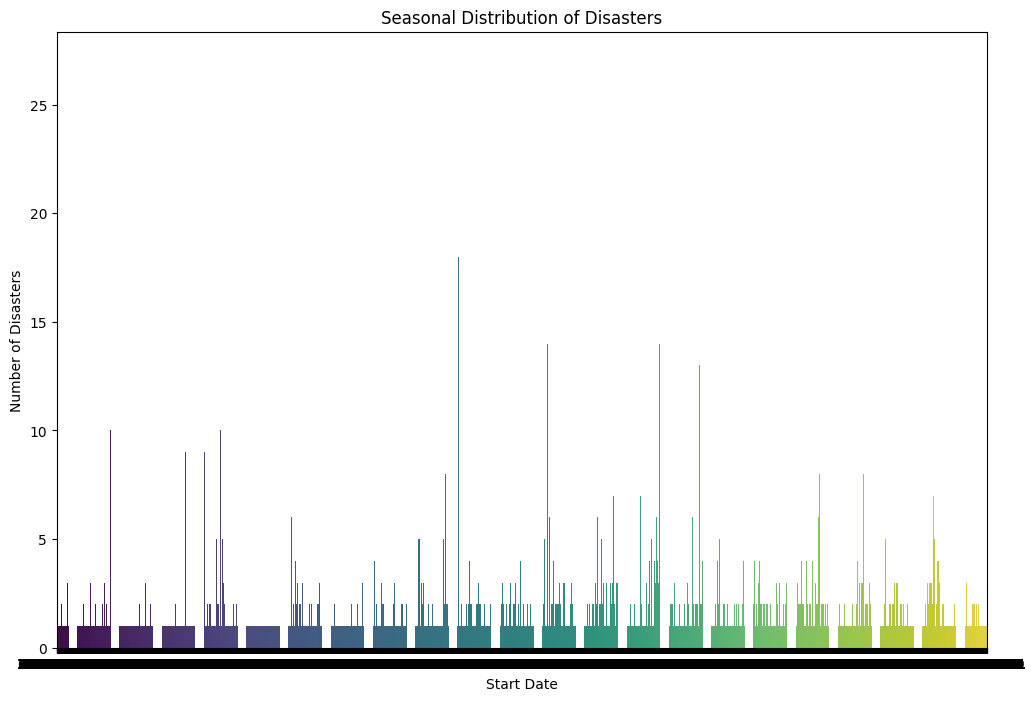

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Start Month' is the column representing the start month of each disaster
plt.figure(figsize=(12, 8))
sns.countplot(x='Start Date', data=df, palette='viridis')
plt.title('Seasonal Distribution of Disasters')
plt.xlabel('Start Date')
plt.ylabel('Number of Disasters')
plt.show()
